In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fuel_ferc1.csv', index_col='record_id')

In [3]:
df['plant_name_ferc1'] = df['plant_name_ferc1'].str.replace('%','')
df['plant_name_ferc1'] = df['plant_name_ferc1'].str.replace('#','')
df

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...
f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct 1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58,gas,mcf,806730.0,1.050,3.65,3.65,6.950
f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990


In [4]:
# Quick bird-eye view of the dataset information. The dataset contains
# 3 object datatypes, 5 floating datatypes and 2 integer datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29523 entries, f1_fuel_1994_12_1_0_7 to f1_fuel_2018_12_12_1_14
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   utility_id_ferc1              29523 non-null  int64  
 1   report_year                   29523 non-null  int64  
 2   plant_name_ferc1              29523 non-null  object 
 3   fuel_type_code_pudl           29523 non-null  object 
 4   fuel_unit                     29343 non-null  object 
 5   fuel_qty_burned               29523 non-null  float64
 6   fuel_mmbtu_per_unit           29523 non-null  float64
 7   fuel_cost_per_unit_burned     29523 non-null  float64
 8   fuel_cost_per_unit_delivered  29523 non-null  float64
 9   fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


In [5]:
df.isnull().sum()

utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [6]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
df['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [8]:
# This code drops any row in the dataset that matches exactly another one across all features
df1= df.drop_duplicates()

In [9]:
df1['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

## Simple Visual of fuel type usage

From the histogram below, it is seen that the gas fuel type recorded the highest usage. 
This implies that, a higher number of plant use coal as a source of energy generation. 
This is closely followed by the coal and oil fuel type respectively. The other fuel type
recorded the lowest usage by plants to generate energy.


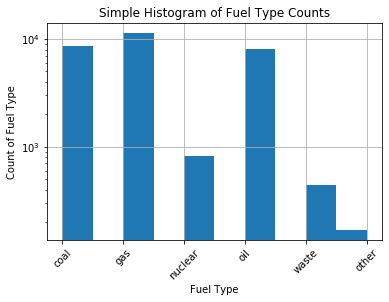

In [10]:
#plt.figure(figsize=(8,8))
df1['fuel_type_code_pudl'].hist(log=True)
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Count of Fuel Type')
plt.title('Simple Histogram of Fuel Type Counts')
plt.show()

## Plant Names Statistics

This cell below illustrates some aggregate statistics about the unique
plant names based on numeric features of the dataset. This include aggregates
such as sum of fuel quantity burned by each plant, the minimum and maximum 
fuel quantity burned by each plant as well as the average fuel quantity that 
has been burned by each plant. The result shows that sabine has burned the highest
quantity of fuel of the years

In [11]:
plant_name_data = (df1.groupby('plant_name_ferc1').agg(Count=('fuel_qty_burned','count'),
                                    Total_Amount=('fuel_qty_burned','sum'),
                                    Max_fuel_brnt=('fuel_qty_burned','max'),
                                    Min_fuel_brnt=('fuel_qty_burned','min'),
                                    Avrg_fuel_brnt=('fuel_qty_burned','mean'))
                                    .sort_values(by='Total_Amount',ascending=False)
                                 
                    )

plant_name_data.head()

,Count,Total_Amount,Max_fuel_brnt,Min_fuel_brnt,Avrg_fuel_brnt
plant_name_ferc1,,,,,
sabine,40,1.527383e+09,99053235.0,25.0,3.818457e+07
sanford,36,1.293785e+09,93498730.0,44605.0,3.593848e+07
ninemile point,35,1.290046e+09,80430230.0,10803.0,3.685846e+07
martin,58,1.142015e+09,52011308.0,22447.0,1.968992e+07
hines energy complex,27,1.133638e+09,93686619.0,45.0,4.198659e+07


## Solution to Question 1

In [12]:
A=[1,2,3,5,6]
B=[13,21,34]
A.extend(B)


A

[1, 2, 3, 5, 6, 13, 21, 34]

## Solution to Question 2

Creating an identity matrix in python using numpy library

In [13]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Solution to Question 3

Gas is the fuel type that has the lowest average fuel cost per unit burned is as shown below.

In [14]:
(df1.groupby(['fuel_type_code_pudl']).agg( 
                                        Avg_fuel_cost_per_unit_burned = ('fuel_cost_per_unit_burned','mean'))
                                        .sort_values(by='Avg_fuel_cost_per_unit_burned',ascending=True)
)

,Avg_fuel_cost_per_unit_burned
fuel_type_code_pudl,
gas,13.664009
other,18.253856
waste,19.549459
coal,67.434027
oil,168.893866
nuclear,4955.157002


## Solution to Question 4

The Standard Deviation and 75th percentile of the measure of energy per unit (fuel_mmbtu_per_unit) feature of the dataset is found as given below

In [15]:
round(df['fuel_mmbtu_per_unit'].describe(),2)

count    29523.00
mean         8.49
std         10.60
min          0.00
25%          1.02
50%          5.76
75%         17.01
max        341.26
Name: fuel_mmbtu_per_unit, dtype: float64

## Solution to Question 5

The skewness and kurtosis of the fuel quantity burned

In [16]:
#Kurtosis value for the fuel quantity burned
kurt = round(df.kurtosis()[2],2)
kurt

#Skewness value for the fuel quantity burned
skew = round(df.skew()[2],2)

print(' Skewness :',skew, '\n','Kurtosis :',kurt)

 Skewness : 15.85 
 Kurtosis : 651.37


## Solution to Question 6

Which feature has missing values, the total number of missing values and the percentage of missing rows as a factor of total number of rows 

In [17]:
print(df.isnull().sum())

print("\n")

print('The percentage of missing value as a factor of the total number of rows is :'
                                        ,round((df['fuel_unit'].isnull().sum()/len(df['fuel_unit']))*100,3),'%')

utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64


The percentage of missing value as a factor of the total number of rows is : 0.61 %


## Solution to Question 7

The feature with the missing data above falls under object/categorical/Non-numeric data and the imputation technique to use is the mode as shown below

In [18]:
print('The feature with the missing data is of type :',df1['fuel_unit'].dtypes)
print('\n')
print(df1['fuel_unit'].mode())

The feature with the missing data is of type : object


0    mcf
dtype: object


In [19]:
# This code populates the missing values in the dataset
df1 = df1.fillna(value='mcf')

# This line checks to see if there are still any missing value, which obviously returned an empty dataframe
df1[df1['fuel_unit'].isnull()]

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,


## Solution to Question 8

The feature with the second and third lowest correlation with the Fuel Cost Per Unit Burned are the fuel quantity burned and fuel mmbtu per unit

In [20]:
df2 = df1.drop(['utility_id_ferc1','report_year'],axis=1)

(df2.corr()
        .sort_values(by='fuel_cost_per_unit_burned',ascending=False)
)

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_cost_per_unit_burned,-0.018540,-0.010039,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.003552,-0.009041,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,-0.001897,-0.005885,-0.000437,-0.000109,1.000000
fuel_mmbtu_per_unit,-0.080963,1.000000,-0.010039,-0.009041,-0.005885
fuel_qty_burned,1.000000,-0.080963,-0.018540,-0.003552,-0.001897


## Solution to Question 9

For the fuel type coal, the percentage change in the fuel cost per unit burned in 1998 compared to 1994 is provided below

In [25]:
# A subset dataset of only coal fuel type
coal_data = df1.loc[df1['fuel_type_code_pudl']=='coal']

# Grouping the coal_data above by their reported years
grp_coal = coal_data.groupby('report_year').sum()

# Selecting the appropriate years needed for our analysis 
# and saving them in two separate variables
year_1,year_2 = grp_coal.loc[[1994,1998],'fuel_cost_per_unit_burned']

# Perform the percentage change in the coal fuel type mathematically
coal_percentage_change = ((year_2-year_1)/year_1)*100
print('The percentage change of coal in 1998 compared to 1994 is :',round(coal_percentage_change),'%')

The percentage change of coal in 1998 compared to 1994 is : -21 %


## Solution to Question 10

The year with the highest average fuel cost per unit delivered is 

In [22]:
avg_fuel_cost = (df1.groupby('report_year')
                 .agg(Avrg_fuel_cost_per_unt_delivered=('fuel_cost_per_unit_delivered','mean'))
                 .sort_values(by='Avrg_fuel_cost_per_unt_delivered',ascending=False)
                )

avg_fuelcost_year = avg_fuel_cost.index[0]
print('The year with the highest average fuel cost per unit delivered was :',avg_fuelcost_year)

The year with the highest average fuel cost per unit delivered was : 1997
